<a href="https://colab.research.google.com/github/URK21CO3018-SKRISHNAKUMAR/krishna-kumar/blob/main/Animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [3]:
path='drive/My Drive/Table_40.csv'
import pandas as pd
df = pd.read_csv(path)
df

,S. No.,State/U.T,Milch Cows - Crossbred - 2007,Milch Cows - Crossbred - 2012,Milch Cows - Crossbred - % Change,Milch Cows - Indigenous - 2007,Milch Cows - Indigenous - 2012,Milch Cows - Indigenous - % Change,Milch Buffaloes - 2007,Milch Buffaloes - 2012,Milch Buffaloes - % Change
0,1,Andhra Pradesh,828.11,1153.25,39.26,2232.82,1928.41,-13.63,6223.72,5102.78,-18.01
1,2,Arunachal Pradesh,5.55,8.37,50.80,90.31,103.98,15.14,0.50,1.14,127.94
2,3,Assam,152.81,158.96,4.02,2532.96,2913.81,15.04,148.36,136.60,-7.93
3,4,Bihar,836.46,1647.73,96.99,2989.88,2873.50,-3.89,2845.96,3112.56,9.37
4,5,Chhattisgarh,58.80,71.45,21.53,2359.56,2515.32,6.60,315.88,315.44,-0.14
5,6,Goa,8.30,9.71,17.03,16.09,13.40,-16.75,16.46,15.19,-7.66
6,7,Gujarat,524.98,962.84,83.41,2003.55,2777.36,38.62,4389.98,5078.82,15.69
7,8,Haryana,267.81,485.60,81.32,339.75,269.00,-20.82,2704.05,2765.26,2.26
8,9,Himachal Pradesh,409.26,520.86,27.27,459.93,372.33,-19.05,447.64,396.50,-11.42
9,10,Jammu & Kashmir,677.65,664.88,-1.88,591.87,481.99,-18.56,551.03,396.39,-28.06


EDA

  S. No.          State/U.T  Milch Cows - Crossbred - 2007  \
0      1     Andhra Pradesh                         828.11   
1      2  Arunachal Pradesh                           5.55   
2      3              Assam                         152.81   
3      4              Bihar                         836.46   
4      5       Chhattisgarh                          58.80   

   Milch Cows - Crossbred - 2012  Milch Cows - Crossbred - % Change  \
0                        1153.25                              39.26   
1                           8.37                              50.80   
2                         158.96                               4.02   
3                        1647.73                              96.99   
4                          71.45                              21.53   

   Milch Cows - Indigenous - 2007  Milch Cows - Indigenous - 2012  \
0                         2232.82                         1928.41   
1                           90.31                          103

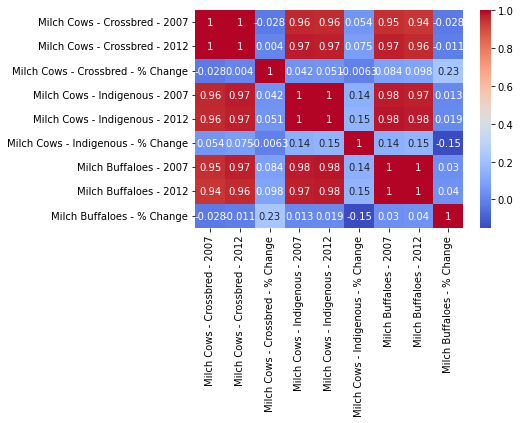

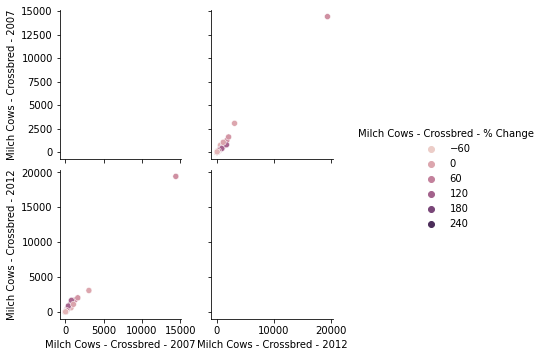

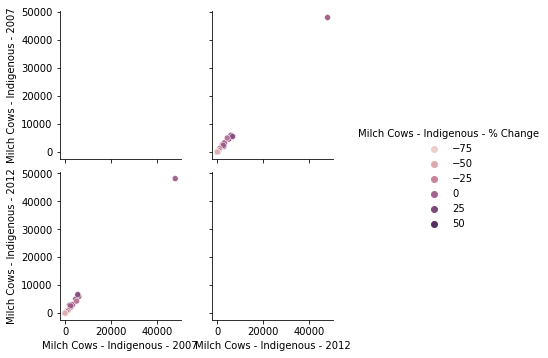

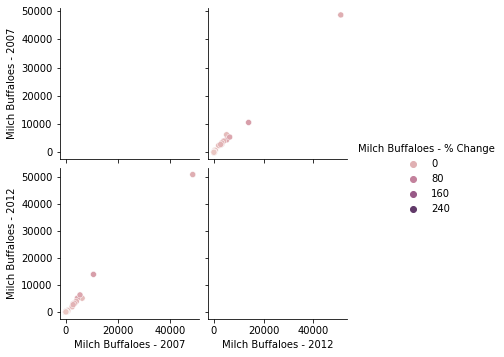

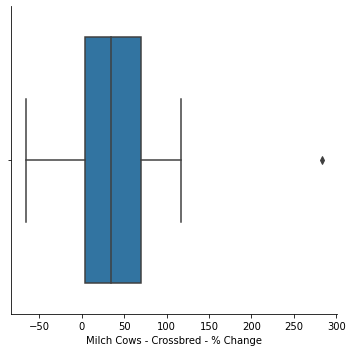

In [50]:
path='drive/My Drive/Table_40.csv'
import pandas as pd
df = pd.read_csv(path)
data = df
# Display the first 5 rows of the data
print(data.head())

grouped_data = data.groupby('State/U.T')[['Milch Cows - Crossbred - 2007', 'Milch Cows - Indigenous - 2007', 'Milch Cows - Indigenous - 2012', 'Milch Buffaloes - 2007', 'Milch Buffaloes - 2012']].sum()

# Print the grouped data
print(grouped_data)

# Check the quality of the data by examining its shape, column names, missing values, and data types.
print(data.shape)
print(data.columns)
print(data.isnull().sum())
print(data.dtypes)

# data using descriptive statistics, and box plots.
print(data.describe())
print(data.isnull().sum())

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Pairplot of selected features
sns.pairplot(data[['Milch Cows - Crossbred - 2007', 'Milch Cows - Crossbred - 2012', 'Milch Cows - Crossbred - % Change']], hue='Milch Cows - Crossbred - % Change')
sns.pairplot(data[['Milch Cows - Indigenous - 2007', 'Milch Cows - Indigenous - 2012', 'Milch Cows - Indigenous - % Change']], hue='Milch Cows - Indigenous - % Change')
sns.pairplot(data[['Milch Buffaloes - 2007', 'Milch Buffaloes - 2012', 'Milch Buffaloes - % Change']], hue='Milch Buffaloes - % Change')
# barplot
sns.catplot(x='Milch Cows - Crossbred - % Change',kind='box',data=df)
print('Mean',df['Milch Cows - Crossbred - % Change'].mean())
print( 'Median' ,df['Milch Cows - Crossbred - % Change'].median())
print( 'Mode' ,df[ 'Milch Cows - Crossbred - % Change' ].mode())
# Show the plots
plt.show()

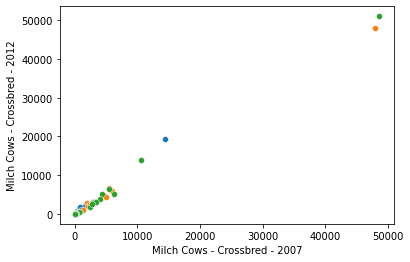

In [43]:
# Scatterplot of numerical variable vs target variable
sns.scatterplot(x='Milch Cows - Crossbred - 2007', y='Milch Cows - Crossbred - 2012', data=data)
sns.scatterplot(x='Milch Cows - Indigenous - 2007', y='Milch Cows - Indigenous - 2012', data=data)
sns.scatterplot(x='Milch Buffaloes - 2007', y='Milch Buffaloes - 2012', data=data)
plt.show()

data cleaning

In [74]:
# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()

# Convert data types
df['Milch Cows - Crossbred - 2007'] = df['Milch Cows - Crossbred - 2007'].astype(int)
df['Milch Cows - Crossbred - 2012'] = df['Milch Cows - Crossbred - 2012'].astype(float)
df['Milch Buffaloes - 2007'] = df['Milch Buffaloes - 2007'].astype(int)
df['Milch Buffaloes - 2012'] = df['Milch Buffaloes - 2012'].astype(float)

# Remove duplicates
df = df.drop_duplicates()

S. No.                                0
State/U.T                             0
Milch Cows - Crossbred - 2007         0
Milch Cows - Crossbred - 2012         0
Milch Cows - Crossbred - % Change     0
Milch Cows - Indigenous - 2007        0
Milch Cows - Indigenous - 2012        0
Milch Cows - Indigenous - % Change    0
Milch Buffaloes - 2007                0
Milch Buffaloes - 2012                0
Milch Buffaloes - % Change            0
dtype: int64


data visualization

Text(0, 0.5, 'Milch Cows - Crossbred - 2007')

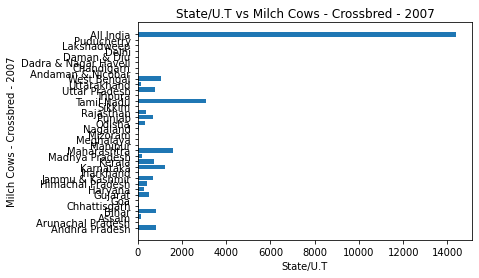

In [68]:
#horizontal bar chart
plt.barh(df['State/U.T'],df['Milch Cows - Crossbred - 2007'] )
plt.title("State/U.T vs Milch Cows - Crossbred - 2007")
plt.xlabel("State/U.T")
plt.ylabel("Milch Cows - Crossbred - 2007")

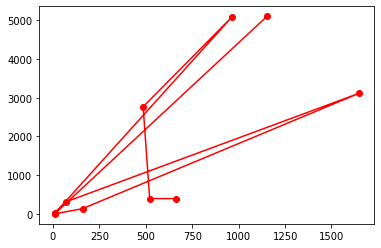

In [67]:
#line chart
import matplotlib.pyplot as plt
plt.plot(df['Milch Cows - Crossbred - 2012'].head(10), df['Milch Buffaloes - 2012'].head(10), marker = 'o', color = 'red')


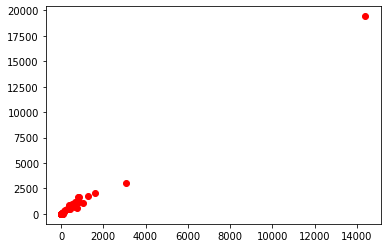

In [66]:
#scatter plot
x = df['Milch Cows - Crossbred - 2007']
y = df['Milch Cows - Crossbred - 2012']
plt.scatter(x, y, c = 'red')

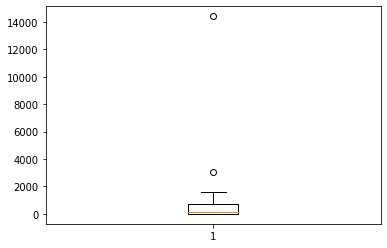

In [65]:
# boxplot
plt.boxplot(df['Milch Cows - Crossbred - 2007']);

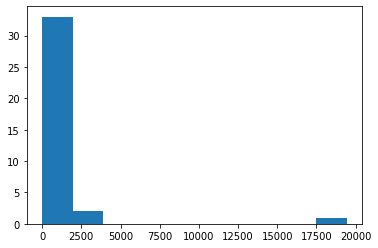

In [64]:
# histogram
plt.hist(df['Milch Cows - Crossbred - 2012']);

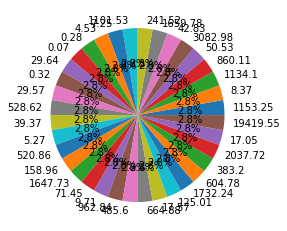

In [63]:
# pie chart
data = df['Milch Cows - Crossbred - 2012'].value_counts()
plt.pie(data.values, labels = data.index, autopct = "%1.1f%%");

<AxesSubplot:>

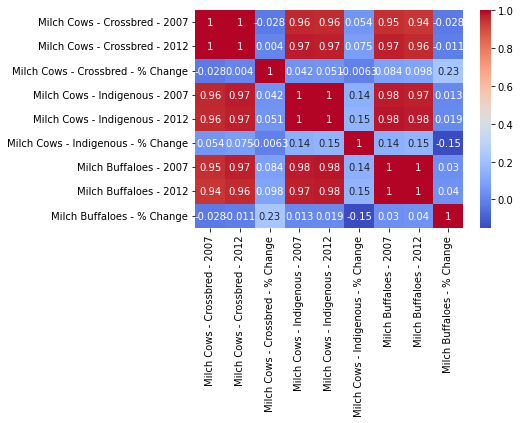

In [71]:
path='drive/My Drive/Table_40.csv'
import pandas as pd
df = pd.read_csv(path)
data = df
grouped_data = data.groupby('State/U.T')[['Milch Cows - Crossbred - 2007', 'Milch Cows - Indigenous - 2007', 'Milch Cows - Indigenous - 2012', 'Milch Buffaloes - 2007', 'Milch Buffaloes - 2012']].sum()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<BarContainer object of 36 artists>

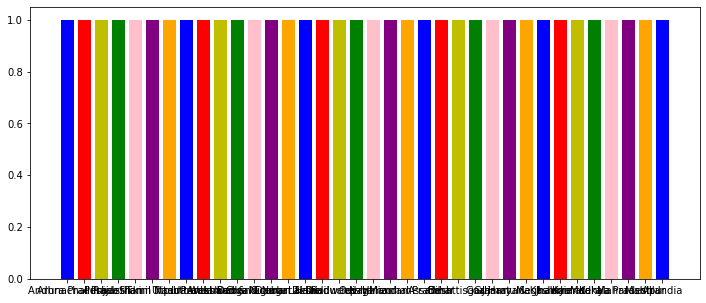

In [72]:
#bar plot 
plt.figure(figsize=(12,5))
data = df['State/U.T'].value_counts()
plt.bar(data.index, data.values, color = ['b', 'r', 'y','g','pink','purple', 'orange'])

In [78]:
x=df[['Milch Cows - Crossbred - 2007','Milch Cows - Crossbred - 2012']]
y=df['Milch Cows - Crossbred - % Change']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.25)

In [79]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)

In [82]:
y_pred = model.predict(x_test)
print(y_pred)

[  72.24554931   71.88135137   74.18120289   74.54050684   54.97806191
   70.66628303   94.73876608   69.70707988   30.66140894 -302.14255444
   64.33269412   84.64439216   70.70129458   59.17897405   72.87501941
   64.13118208   72.52861218   72.87105261   13.84159709   72.87482914
   78.359861     72.97312146  111.11952555   76.23567981   43.7247627
   72.29968435 -111.86140442]


In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print('variance score:',r2_score(y_test, y_pred))

print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred))) 

Mean absolute error: 55.21651028773495
Mean squared error: 7743.861475367257
variance score: -2.1071009418769377
Root Mean Squared Error: 87.99921292470324
